# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())


720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
# print(df)
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
# * Print how long our dataframe is.

print(len(df))

11194


In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()
print(len(df))


11092


In [9]:
# * Do a sanity check and print how long our dataframe is now that we have removed our null values.
print(len(df))


11092


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:>

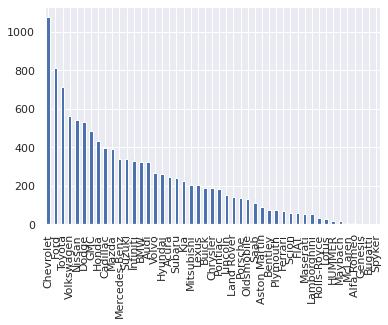

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
df["Make"].value_counts().plot(kind='bar')


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:title={'center':'Most Different Kind of Cars by Make'}>

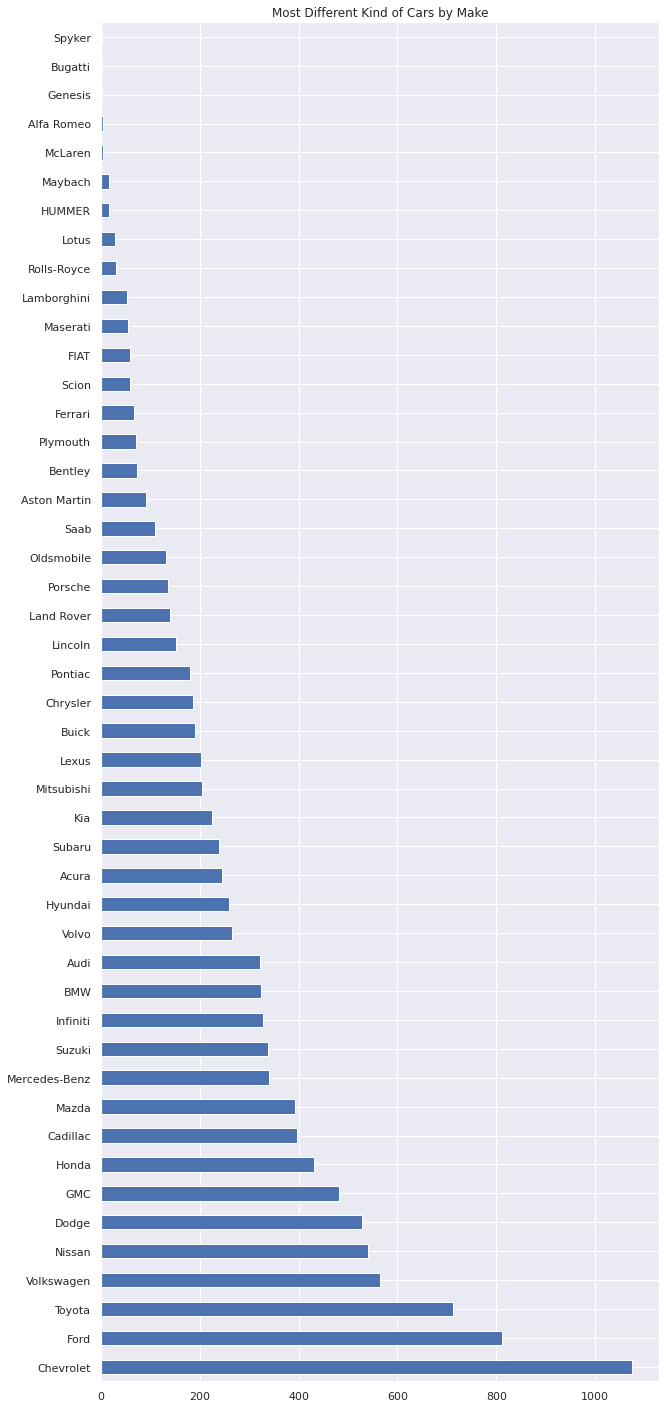

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
# df.sort_values(by=['Make']).value_counts().plot(kind="barh", figsize =(10, 25), title="Number of Makes")

# https://exchangetuts.com/pandas-dataframe-bar-plot-with-sort-values-by-other-column-1640090642874939
# https://stackoverflow.com/questions/57048986/pandas-sort-values-function-not-working-as-intended
# sorted_df = df[['Make']].sort_values(by='Make', ascending=False)
# print(sorted_df)
# sorted_df.plot(kind='bar', figsize=(10,25))

# .sort_values() helper function does not play well with plotting for some reason. Don't know why



# https://re-thought.com/pandas-value_counts/\
sorted_df = df['Make'].value_counts()
sorted_df.plot(kind='barh', figsize=(10,25), title="Most Different Kind of Cars by Make")

# 1. Get Coloumn
# 2. Sort by Make columns by .value_counts
# 3. then plot

# gb_make = df.groupby("Make")

# gb_make["Make"].count().plot(kind="bar")

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

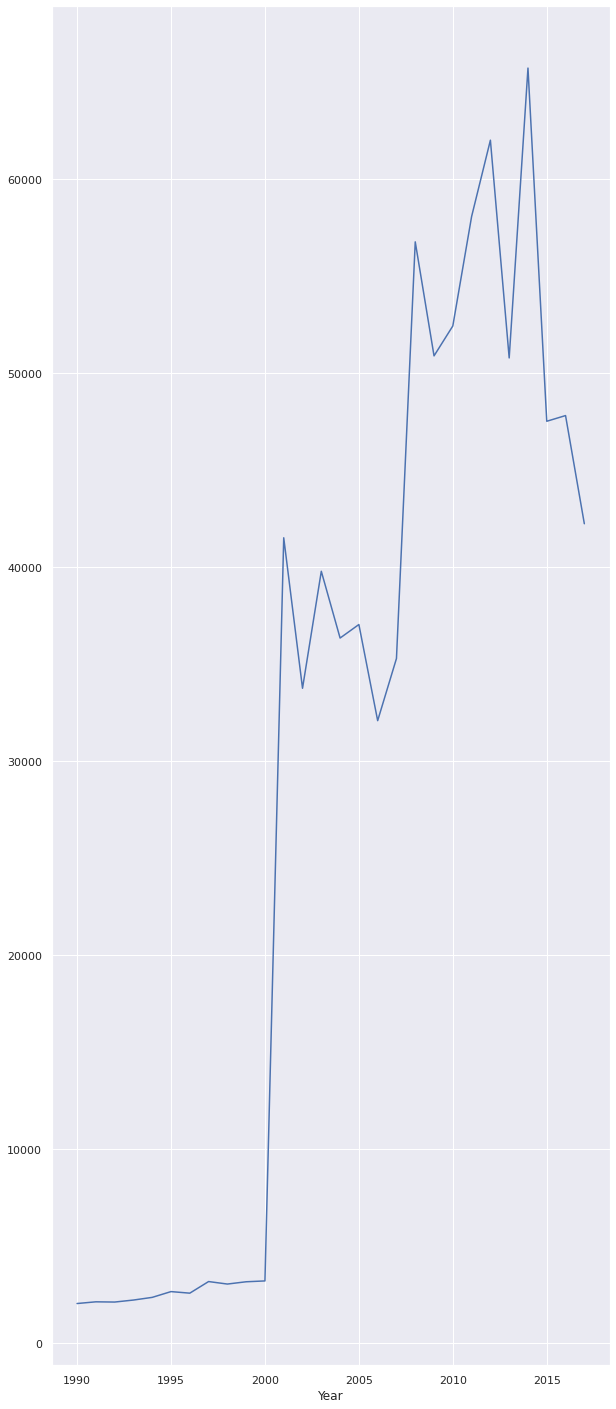

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
year_df = df.groupby(['Year'])
year_df.head()
year_df['MSRP'].mean().plot(kind="line",figsize=(10,25))

# Also reference : https://stackoverflow.com/questions/43320301/plot-with-pandas-group-and-mean

# sorted_df.plot(kind='line', x='Year', y='MSRP', figsize=(10,25), title="Most Popular Makes by Year and MSRP")

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = np.where(df['Year']<=2000, df['MSRP']*10, df['MSRP'])

# np.where(
#     cond1: filters column with this condition, 
#     cond2 : manipulates the column values for each row, 
#     cond3: type of value copied from this column
# )
# Also reference : https://numpy.org/doc/stable/reference/generated/numpy.where.html


df['adjusted_price']

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: adjusted_price, Length: 11092, dtype: int64

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

In [15]:
# df[filter_year]

<AxesSubplot:title={'center':'New Adjusted MSRP Price by Year'}, xlabel='Year'>

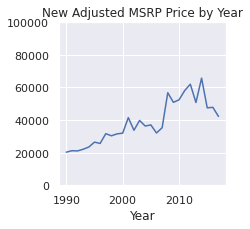

In [16]:
# Plot new prices
gb_new_price = df.groupby(['Year'])

# Set ylim as another parameter on plot
gb_new_price['adjusted_price'].mean().plot(
    kind="line",
    figsize=(3,3),
    ylim=(0,100000),
    title='New Adjusted MSRP Price by Year'
)


# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [17]:
# What are the top 5 car makers make the most expensive cars on average. 
# Approach:
#     1. groupby the Make
#     2. then another column with adj price 
#     3. .mean() the 2 columns and sort
    
gb_makers = df.groupby(['Make'])

# Always .mean on a column when groupby column then accessing the column values
top_five_expensive = gb_makers['adjusted_price'].mean().sort_values(ascending=False)
top_five_expensive.head()

Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [18]:
# Which car makers have the highest median highway MPG?
# Sanity check
gb_makers.head()

med_hwy_MPG = gb_makers['highway MPG'].mean().sort_values(ascending=False)
med_hwy_MPG.head()

Make
Alfa Romeo    34.000000
FIAT          33.915254
Scion         32.300000
Honda         32.062645
Volkswagen    32.015957
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

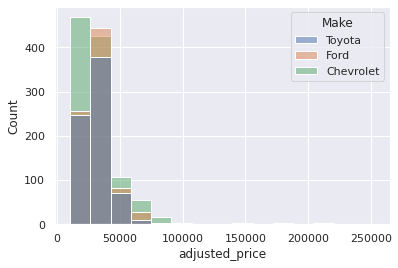

In [19]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
# Makes a new df with this as a conditional.
# condition 1 -> df['Make'].isin(['Chevrolet', 'Ford', 'Toyota']

temp_df = df[df['Make'].isin(['Chevrolet', 'Ford', 'Toyota'])]

# Ref : https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=temp_df, x=temp_df['adjusted_price'], hue='Make',bins= 15)


# Remake the same histogram, but limit the x-axis from 0 to 100,000

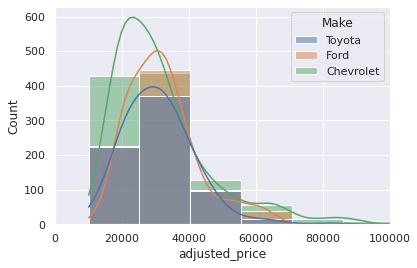

In [20]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

# Matplotlib method works on the seaborns df
# Seaborns makes an Axes object
# https://www.geeksforgeeks.org/how-to-change-axes-limits-in-seaborn/
ax_histogram = sns.histplot(
    data = temp_df,
    x = temp_df['adjusted_price'],
    hue = 'Make',
    bins = 16,
    kde=True
).set_xlim(0,100000)


# Plot the relationship between Engine HP and highway MPG

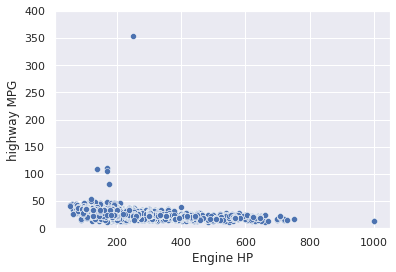

In [21]:
# Plot the relationship between Engine HP and highway MPG
ax_scatterplot = sns.scatterplot(
    data = df,
    x = 'Engine HP',
    y = 'highway MPG'
).set_ylim(0,400)


# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

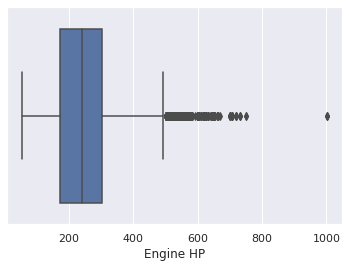

In [22]:
# create a boxplot for the 'Engine HP'
ax_boxplot = sns.boxplot(
    x = df['Engine HP']
)

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

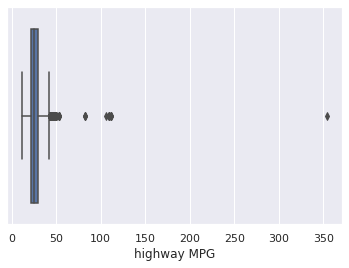

In [23]:
# create a boxplot for the 'highway MPG'
sns.boxplot(
    x = df['highway MPG']
)

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [24]:
# Remove any  outliers from Engine HP and highway MPG 

# Calculating quartiles of :
#     df['Engine HP']
Q1_Engine_HP = df['Engine HP'].quantile(0.25)
Q3_Engine_HP = df['Engine HP'].quantile(0.75)
IQR = Q3_Engine_HP - Q1_Engine_HP
# Creates conditionals to search our columns
#     Make sure it is within bounds of our IQR
outliers_above_EngineHP = df['Engine HP'] < (Q1_Engine_HP - 1.5 * IQR)
outliers_below_EngineHP = df['Engine HP'] > (Q3_Engine_HP + 1.5 * IQR)




In [25]:
# Calculating quartiles of :
#     df['highway MPG']
Q1_highway_MPG = df['highway MPG'].quantile(0.25)
Q3_highway_MPG = df['highway MPG'].quantile(0.75)
IQR = Q3_highway_MPG - Q1_highway_MPG

outliers_above_highwayMPG = df['highway MPG'] < (Q1_highway_MPG - 1.5 * IQR)
outliers_below_highwayMPG = df['highway MPG'] > (Q3_highway_MPG + 1.5 * IQR)


In [26]:
# # # Select the INVERSE of the selections
removed_outliers_df = df[ ~(outliers_above_EngineHP | outliers_below_EngineHP | outliers_above_highwayMPG | outliers_below_highwayMPG) ]

# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

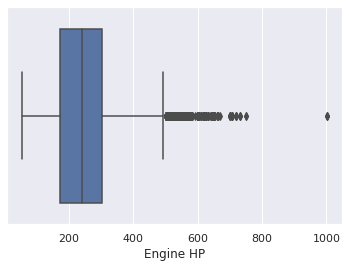

In [27]:
# Engine HP boxplot
sns.boxplot(
    x = df['Engine HP']
)

<AxesSubplot:xlabel='highway MPG'>

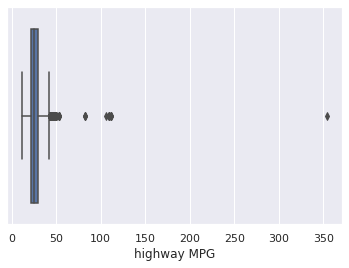

In [28]:
# highway MPG boxplot
sns.boxplot(
    x = df['highway MPG']
)


# Make a scatter plot of Engine HP vs highway MPG

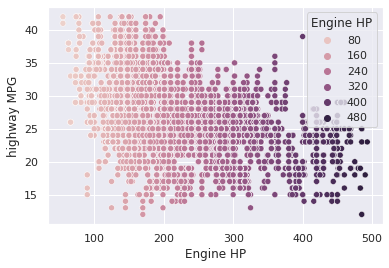

In [29]:
# Make a scatter plot of Engine HP vs highway MPG
ax_comp_HP_MPG = sns.scatterplot(
    data = removed_outliers_df,
    x = "Engine HP",
    y = 'highway MPG',
    hue = 'Engine HP',
)

# What does this plot tell you about how Engine HP affects highway MPG?

In [30]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('We can see for the majority, MPG goes up as Engine HP increases, but is not always true so the correlation is not fully correct.')

We can see for the majority, MPG goes up as Engine HP increases, but is not always true so the correlation is not fully correct.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

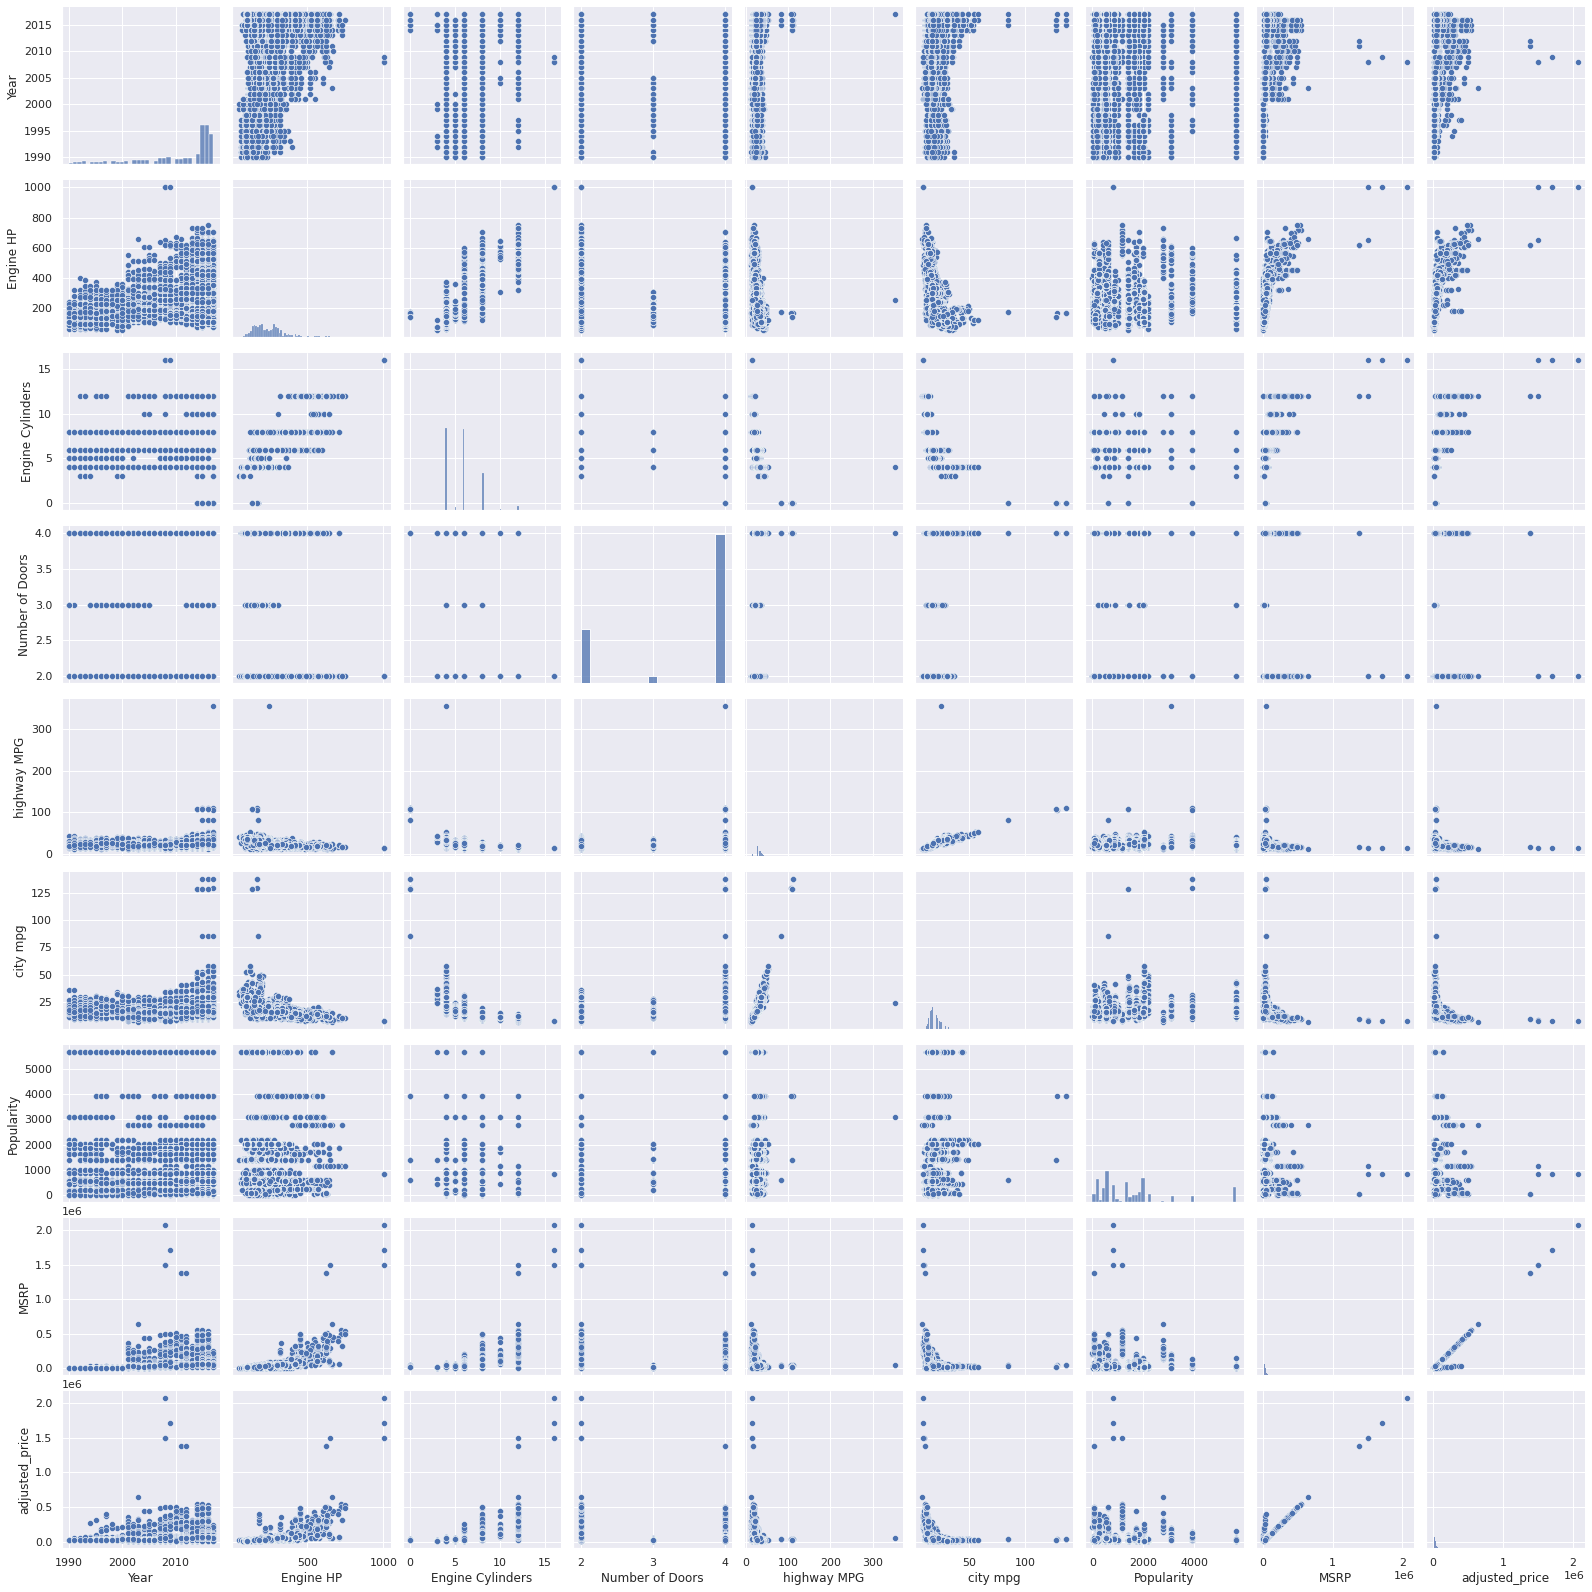

In [31]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(data=df)

In [32]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
df.corr()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price
Year,1.000000,0.337207,-0.026926,0.245804,0.265521,0.220037,0.086693,0.209315,0.113148
Engine HP,0.337207,1.000000,0.788325,-0.128704,-0.423809,-0.474851,0.041352,0.658987,0.638360
Engine Cylinders,-0.026926,0.788325,1.000000,-0.147885,-0.614795,-0.634509,0.042393,0.552042,0.564146
Number of Doors,0.245804,-0.128704,-0.147885,1.000000,0.116846,0.137381,-0.059199,-0.145690,-0.183829
highway MPG,0.265521,-0.423809,-0.614795,0.116846,1.000000,0.842834,-0.024804,-0.207796,-0.234801
city mpg,0.220037,-0.474851,-0.634509,0.137381,0.842834,1.000000,-0.007093,-0.232722,-0.255122
Popularity,0.086693,0.041352,0.042393,-0.059199,-0.024804,-0.007093,1.000000,-0.048438,-0.049758
MSRP,0.209315,0.658987,0.552042,-0.145690,-0.207796,-0.232722,-0.048438,1.000000,0.984767
adjusted_price,0.113148,0.638360,0.564146,-0.183829,-0.234801,-0.255122,-0.049758,0.984767,1.000000


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

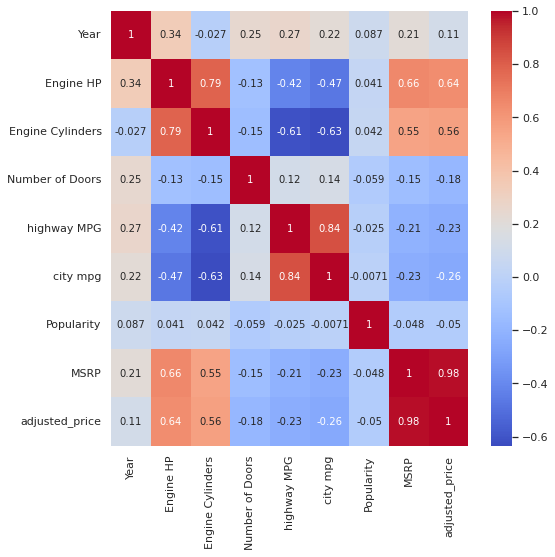

In [33]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8, 8))

ax = sns.heatmap(
    df.corr(),
    annot=True, 
    cmap='coolwarm'
)



In [34]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine Cylinder and Engine HP have strong correlations probably becuase they are in similar categories.')

Engine Cylinder and Engine HP have strong correlations probably becuase they are in similar categories.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [35]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
